In [80]:
import os
import platform

def creation_date(path_to_file):
    """
    Try to get the date that a file was created, falling back to when it was
    last modified if that isn't possible.
    See http://stackoverflow.com/a/39501288/1709587 for explanation.
    """
    if platform.system() == 'Windows':
        return os.path.getctime(path_to_file)
    else:
        stat = os.stat(path_to_file)
        try:
            return stat.st_birthtime
        except AttributeError:
            # We're probably on Linux. No easy way to get creation dates here,
            # so we'll settle for when its content was last modified.
            return stat.st_mtime
import pandas as pd
classes = pd.read_csv(r"train_mod.csv")
import glob
list_of_id = []
list_of_date = []
list_of_names = []
for file in glob.glob(r"images\images\*.jpg"):

    file_name = file.split("\\")[-1]
    if len(classes[classes.image == file_name].class_id) !=0:
        class_id = classes[classes.image == file_name].class_id.values[0]
        number = creation_date(file)
        list_of_id.append(class_id)
        list_of_date.append(number)
        list_of_names.append(file_name)

In [ ]:
import pandas as pd

pd.DataFrame({"class_id":list_of_id,"image":list_of_names, "date":list_of_date}).to_csv("mktime_train.csv",index=False)

In [ ]:
import os
import platform

def creation_date(path_to_file):
    """
    Try to get the date that a file was created, falling back to when it was
    last modified if that isn't possible.
    See http://stackoverflow.com/a/39501288/1709587 for explanation.
    """
    if platform.system() == 'Windows':
        return os.path.getctime(path_to_file)
    else:
        stat = os.stat(path_to_file)
        try:
            return stat.st_birthtime
        except AttributeError:
            # We're probably on Linux. No easy way to get creation dates here,
            # so we'll settle for when its content was last modified.
            return stat.st_mtime
import pandas as pd
classes = pd.read_csv(r"test_mod.csv")
import glob
list_of_id = []
list_of_date = []
list_of_names = []
for file in glob.glob(r"images\images\*.jpg"):

    file_name = file.split("\\")[-1]
    if len(classes[classes.image == file_name].class_id) !=0:
        class_id = classes[classes.image == file_name].class_id.values[0]
        number = creation_date(file)
        list_of_id.append(class_id)
        list_of_date.append(number)
        list_of_names.append(file_name)

In [ ]:
import pandas as pd

pd.DataFrame({"class_id":list_of_id,"image":list_of_names, "date":list_of_date}).to_csv("mktime_test.csv",index=False)

In [78]:
classes_test = pd.read_csv(r"test_mod_wdup_plus_avg_32.csv")
classes_test[classes_test.class_id != -1]

,class_id,image
2,310,mldYZ9OiXh5P0ERHNcKLp78SbMtfkBx2rwJeszoa.jpg
3,1300,tZaCF4XK2hPLTlW8YRdAnMD5mfSxzBujwVpUJ7b0.jpg
16,3493,eClpO81ZfSDBTaUmR0hNt7zJvc5Xkw6MP9sIyH4x.jpg
17,1690,k3ag2D5WoqSPUj9mJuGLv81bYyCFRzds04iBINx6.jpg
21,1179,sU1MpVZRtlvoOiKbh5keCA0SFDHXaGgmqnJWB8rQ.jpg
...,...,...
31692,939,G1EvP9CDLi3Jhfkp7eQ5qU6RVsjH0ySdzBo4c2Zn.jpg
31694,2873,0f3PCimQERBF4O7zct9gqAUKZyIadoXT8rWvVNLn.jpg
31703,1690,GxJHBSUrMf4d7ImaC0PZNE3cuLX1AsgtzkKiDQbT.jpg
31707,2642,DRWHCogThIfrZnU6K2VMQcayPu54jFObd1emtNqG.jpg


In [81]:
classes_test = pd.read_csv(r"test_mod_wdup_plus_avg_32.csv")
classes_test = classes_test[classes_test.class_id != -1]
import glob
list_of_id_test = []
list_of_date_test = []
list_of_filename_test = []
for file in glob.glob(r"images\images\*.jpg"):
    file_name = file.split("\\")[-1]
    if len(classes_test[classes_test.image == file_name].class_id) !=0:
        class_id = classes_test[classes_test.image == file_name].class_id.values[0]
        number = creation_date(file)
        list_of_id_test.append(class_id)
        list_of_date_test.append(number)
        list_of_filename_test.append(file_name)

In [93]:
import plotly.graph_objs as go

db = dict(zip(list_of_date,list_of_id))
db_test = dict(zip(list_of_date_test,list_of_id_test))
db_test_name = dict(zip(list_of_date_test,list_of_filename_test))
db = {key:val for key, val in db.items() if key > 1677548202}
db_test = {key:val for key, val in db_test.items() if key > 1677548202}
db_test_name = {key:val for key, val in db_test_name.items() if key > 1677548202}

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(db.keys()),
    y=list(db.values()),
    mode="markers",
    marker=dict(
        color="red"
    )
))

fig.add_trace(go.Scatter(
    x=list(db_test.keys()),
    y=list(db_test.values()),
    mode="markers",
        marker=dict(
        color="blue"
    )
))

fig.update_layout(
    title="Scatter Plot of IDs vs Dates",
    xaxis_title="Date",
    yaxis_title="ID"
)

if len(db) > 1:
    fig.show()
else:
    print("Insufficient data to plot the graph")


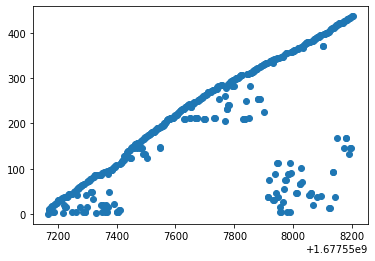

In [48]:
plt.scatter(db.keys(),db.values())

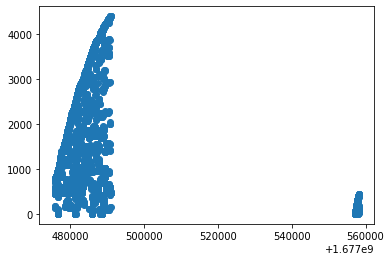

In [39]:
plt.scatter(db.keys(),db.values())